# Titanic

Using deep learning to make predictions for the popular kaggle titanic competition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [2]:
train_filepath = "./data/train.csv"
test_filepath = "./data/test.csv"

train_data = pd.read_csv(train_filepath)
test_data = pd.read_csv(test_filepath)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Age', ylabel='Fare'>

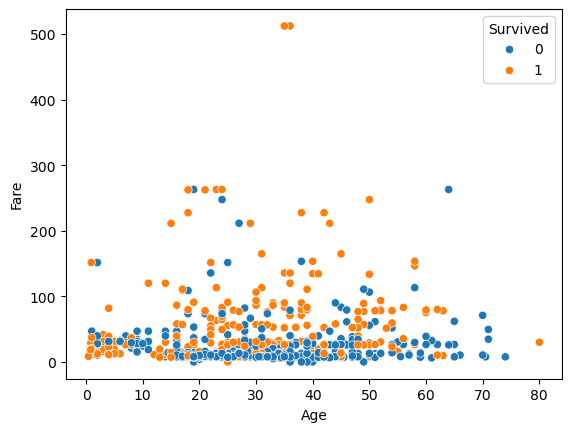

In [3]:
sns.scatterplot(x=train_data['Age'], y=train_data['Fare'], hue=train_data['Survived'])

In [4]:
#Combining the test and train data for easier data cleaning
import numpy as np

# Store PassengerId for test data for final submission
test_passenger_ids = test_data["PassengerId"]

test_data['Survived'] = np.nan
all_data = pd.concat([train_data, test_data])

#Create a family size feature
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1

#Create a feature for if the person is alone
all_data['IsAlone'] = 0
all_data.loc[all_data['FamilySize'] == 1, 'IsAlone'] = 1

#Create a feature for the title of the person
all_data['Title'] = all_data['Name'].str.extract(' ([A-Za-z]+).', expand=False)
# Group rare titles
all_data['Title'] = all_data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
all_data['Title'] = all_data['Title'].replace('Mlle', 'Miss')
all_data['Title'] = all_data['Title'].replace('Ms', 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

#We've created use1features from the data, so we can drop the columns we don't need
all_data = all_data.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

all_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0.0,3,male,22.0,7.2500,S,2,0,Mr
1,2,1.0,1,female,38.0,71.2833,C,2,0,Mrs
2,3,1.0,3,female,26.0,7.9250,S,1,1,Miss
3,4,1.0,1,female,35.0,53.1000,S,2,0,Mrs
4,5,0.0,3,male,35.0,8.0500,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,NaN,8.0500,S,1,1,Mr
414,1306,NaN,1,female,39.0,108.9000,C,1,1,y
415,1307,NaN,3,male,38.5,7.2500,S,1,1,Mr
416,1308,NaN,3,male,NaN,8.0500,S,1,1,Mr


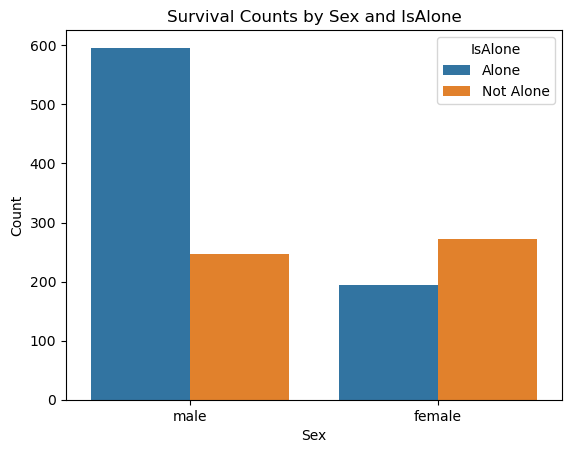

In [5]:
sns.countplot(x='Sex', hue='IsAlone', data=all_data, hue_order=[True, False])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Counts by Sex and IsAlone')
plt.legend(title='IsAlone', loc='upper right', labels=['Alone', 'Not Alone'])
plt.show()

### Handling missing values and categorical data


In [6]:
#Fill missing embarked values with the most common value
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])

#Fill missing fare values with the median fare
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].median())

#Fill missing age values with the median age
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

#To recheck which columns have missing values
all_data.isnull().sum()


PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
dtype: int64

In [7]:
all_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0.0,3,male,22.0,7.2500,S,2,0,Mr
1,2,1.0,1,female,38.0,71.2833,C,2,0,Mrs
2,3,1.0,3,female,26.0,7.9250,S,1,1,Miss
3,4,1.0,1,female,35.0,53.1000,S,2,0,Mrs
4,5,0.0,3,male,35.0,8.0500,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,28.0,8.0500,S,1,1,Mr
414,1306,NaN,1,female,39.0,108.9000,C,1,1,y
415,1307,NaN,3,male,38.5,7.2500,S,1,1,Mr
416,1308,NaN,3,male,28.0,8.0500,S,1,1,Mr


In [8]:
#One hot encode the categorical features
all_data = pd.get_dummies(all_data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

In [9]:
all_data.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,...,Title_Pelsmaeker,Title_Planke,Title_Rare,Title_Shawah,Title_Steen,Title_Velde,Title_Walle,Title_der,Title_the,Title_y
0,1,0.0,3,22.0,7.2500,2,0,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,38.0,71.2833,2,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,26.0,7.9250,1,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,1.0,1,35.0,53.1000,2,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,0.0,3,35.0,8.0500,1,1,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#Split the data back into train and test data
train_data = all_data[all_data['Survived'].notnull()]
test_data = all_data[all_data['Survived'].isnull()]
test_data = test_data.drop('Survived', axis=1)

test_data.head()

,PassengerId,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Brito,...,Title_Pelsmaeker,Title_Planke,Title_Rare,Title_Shawah,Title_Steen,Title_Velde,Title_Walle,Title_der,Title_the,Title_y
0,892,3,34.5,7.8292,1,1,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,893,3,47.0,7.0000,2,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,894,2,62.0,9.6875,1,1,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,895,3,27.0,8.6625,1,1,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,896,3,22.0,12.2875,3,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Split the train data into features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

#Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


model = Sequential([
    Dense(32, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

2024-06-15 21:30:46.421411: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-15 21:30:46.497843: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ileri/miniconda3/envs/tf_gpu_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_train = y_train.astype(np.int32)
y_val = y_val.astype(np.int32)

survived = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - binary_accuracy: 0.4066 - loss: 15.0863 - val_binary_accuracy: 0.5810 - val_loss: 3.8089
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6011 - loss: 2.5394 - val_binary_accuracy: 0.5978 - val_loss: 1.2039
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6187 - loss: 0.9757 - val_binary_accuracy: 0.6034 - val_loss: 0.7391
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6164 - loss: 0.7476 - val_binary_accuracy: 0.6760 - val_loss: 0.6151
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6602 - loss: 0.6328 - val_binary_accuracy: 0.6480 - val_loss: 0.6615
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6665 - loss: 0.6444 - val_binary_accuracy: 0.6648 - val_loss: 0.6005
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6944 - loss: 0.6106 - val_binary_accuracy: 0.7039 - val_loss: 0.5467
Epoch 8/100

In [14]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8068 - loss: 0.4364 
Validation Accuracy: 0.7877094745635986


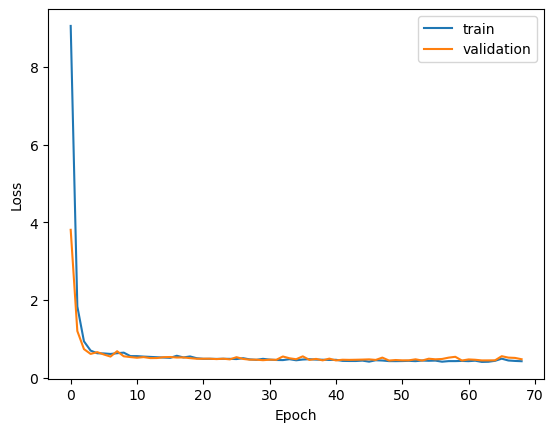

In [15]:
#Plot the training and validation loss
plt.plot(survived.history['loss'], label='train')
plt.plot(survived.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
test_data = test_data.astype(np.float32)

predictions = model.predict(test_data).flatten()
predictions = np.where(predictions < 0.5, 0, 1)

# Create submission file
submission = pd.DataFrame({
    "PassengerId": test_data['PassengerId'].astype(int),  # Use the original 'PassengerId' from test data
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
